# importing libaries 

In [2]:
#importing libaries for data manipulation, visualization, 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# load the dataset 

In [3]:
#loading the dataset
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Performing data description

In [4]:
#dataframe information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
#statistical information 
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
#measuring the skewness of the age and NA_to_K values 
skewAge = df.Age.skew(axis=0, skipna=True)
skewNatoK = df.Na_to_K.skew(axis=0, skipna=True)
print('Age skewness:', skewAge)
print('Na to K skewness:', skewNatoK)

Age skewness: 0.03030835703000607
Na to K skewness: 1.039341186028881


Age skewness: 0.03030835703000607 (close to 0)
This indicates that the distribution of ages is approximately symmetric or very slightly skewed. The tail of the distribution is not pronounced.
Na to K skewness: 1.039341186028881 (positive value)
This indicates that the distribution of the ratio of sodium to potassium has a longer tail on the right side. It is positively skewed, suggesting that there are some higher values that pull the distribution towards the right.

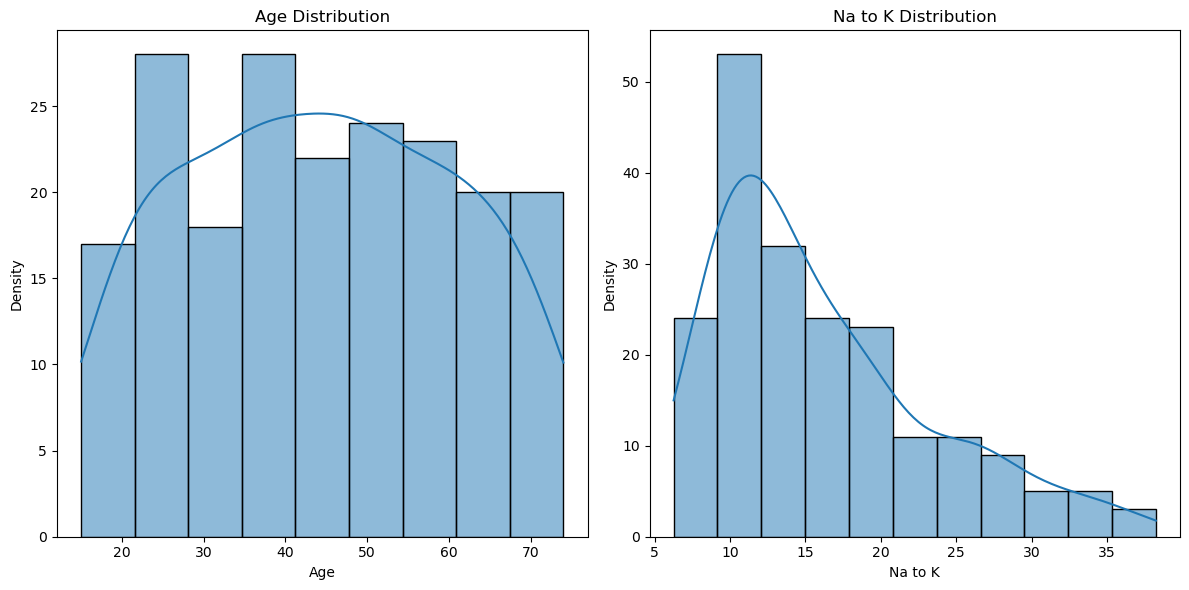

In [7]:
#craeting a histogram figure with two subplots of age and Na_to_K representing the distributions
plt.figure(figsize=(12, 6))  

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', kde=True)  
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')  

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Na_to_K', kde=True)  
plt.title('Na to K Distribution')
plt.xlabel('Na to K')
plt.ylabel('Density')  

#The histograms provide visual information about the shape, spread, and concentration of data points for each variable.
plt.tight_layout()
plt.show()

The distribution of 'Age' column is symetric, since the skewness value between -0.5 and 0.5.
The distribution of 'Na_to_K' column is moderately skewed, since the skewness value is between 0.5 and 1. It can also be seen from the histogram for 'Na_to_K' column

In [8]:
#checking for null values in the dataset
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


From the results above, there are no missing/null value in this dataset

# Explorative Data Analytics

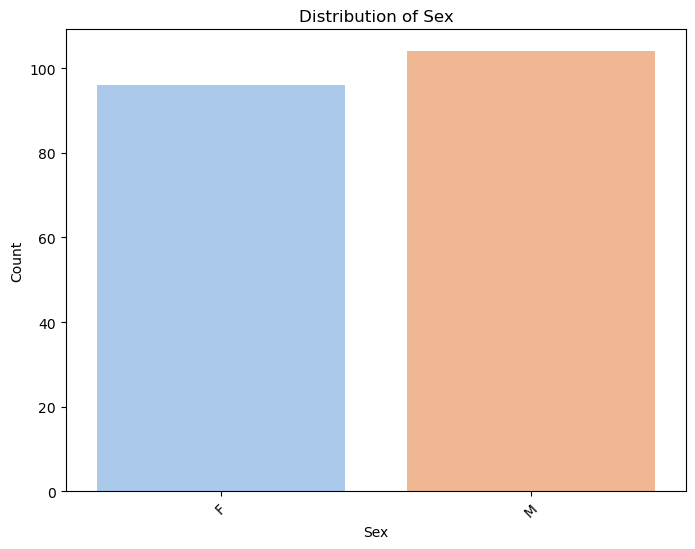

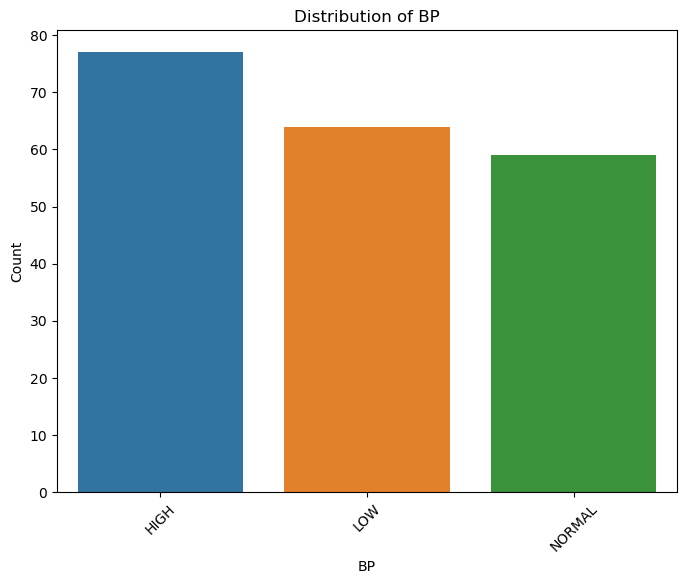

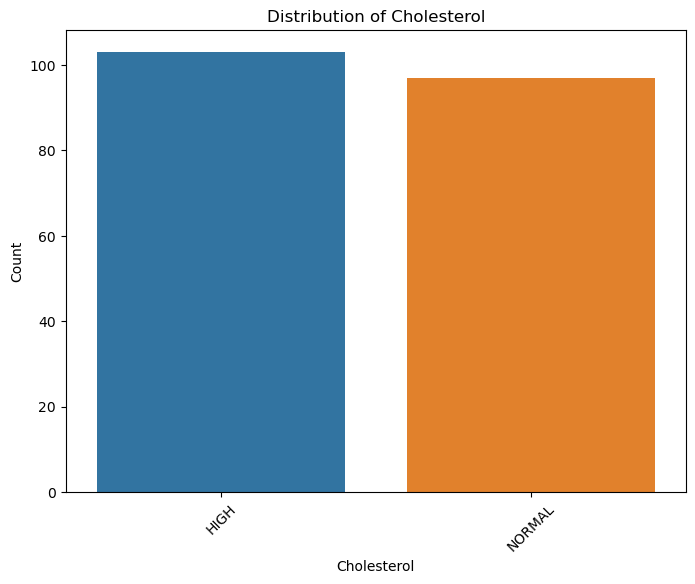

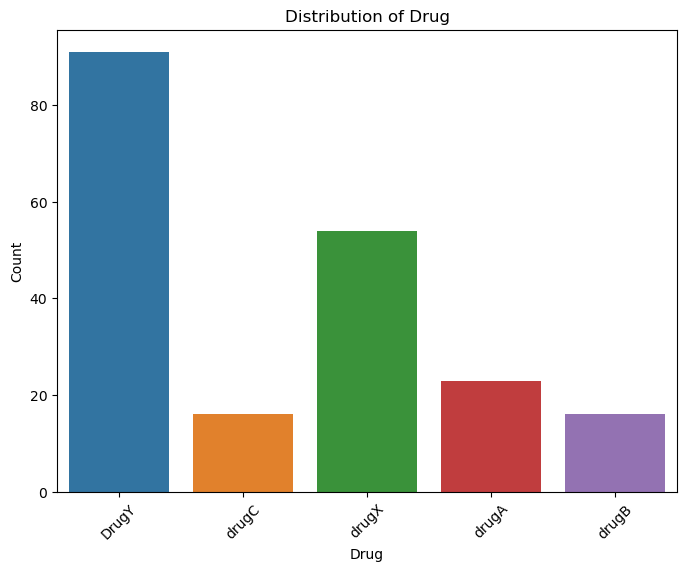

In [9]:
#plotting the categoricla variables into graphs showing the distribution of each variable 
categorical_vars = ['Sex', 'BP', 'Cholesterol', 'Drug']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))

    if var == 'Sex':
        sns.countplot(x=var, data=df, palette='pastel')  
    else:
        sns.countplot(x=var, data=df)

    plt.title(f"Distribution of {var}")
    plt.xlabel(var)  
    plt.ylabel('Count')  
    plt.xticks(rotation=45)  
    plt.show()

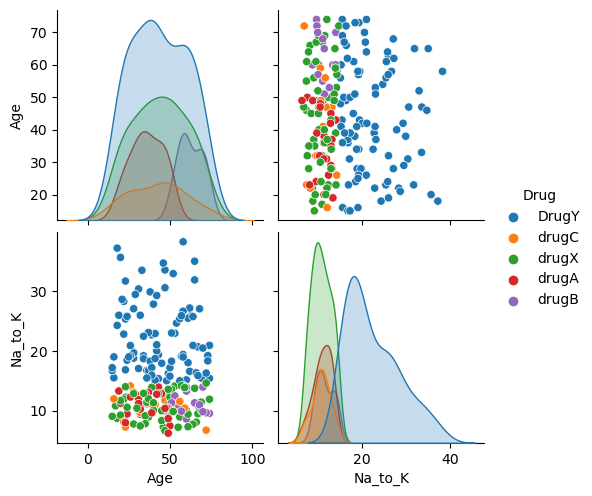

In [10]:
#plotting a pairplor with the key variable for Agr and Na_to_K is Drug
sns.pairplot(df, hue='Drug')
plt.show()

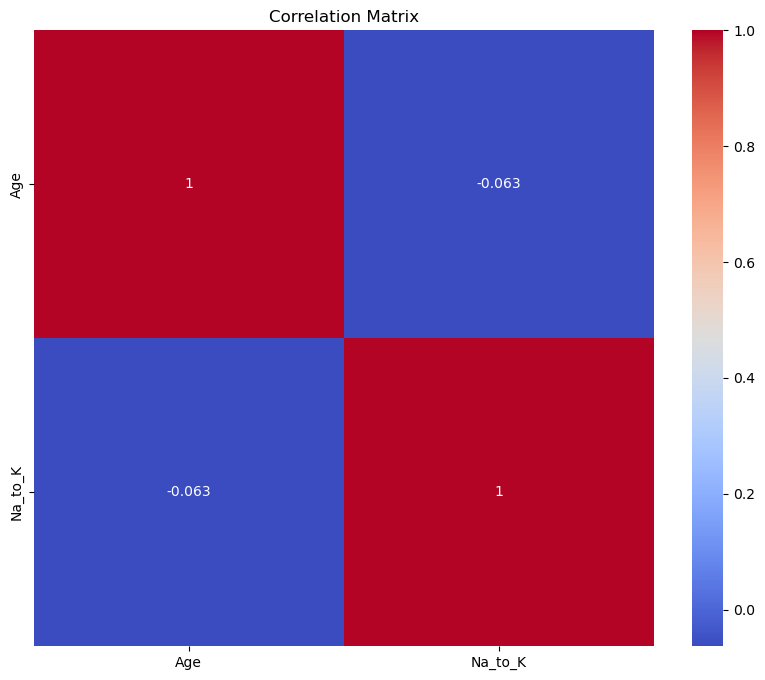

In [11]:
#plotting a correlation matrix 
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

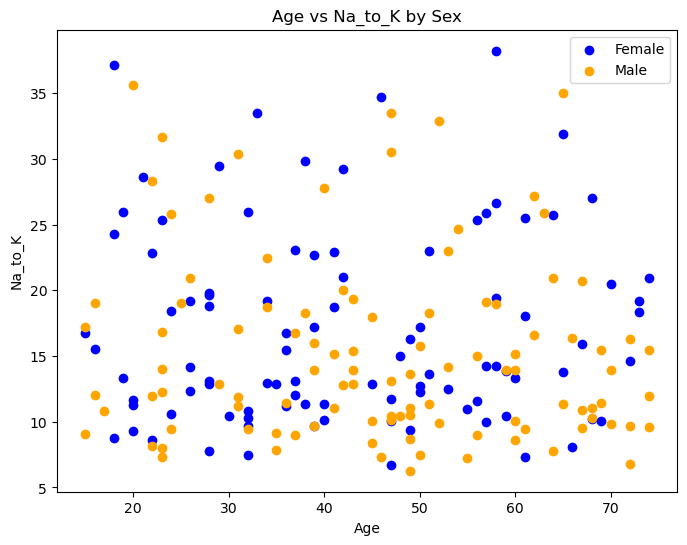

In [12]:
#plotting a scatter plot for Na_to_K Distribution based on Gender and Age
plt.figure(figsize=(8, 6))
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.title("Age vs Na_to_K by Sex")
plt.show()


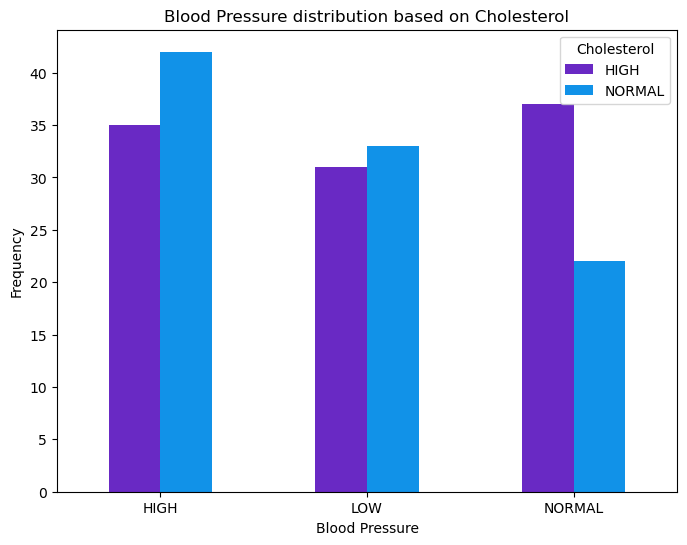

In [13]:
#plotting a histogram for blood Pressure Distribution based on Cholesetrol 
pd.crosstab(df.BP, df.Cholesterol).plot(kind="bar", figsize=(8,6), color=['#6929c4', '#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


# Data preprocessing 

## Data binning

The age will be divided into 7 age categories:

Below 20 y.o.
20 - 29 y.o.
30 - 39 y.o.
40 - 49 y.o.
50 - 59 y.o.
60 - 69 y.o.
Above 70

In [14]:
# Define the bin edges and labels for 'Age'
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']

# Bin the 'Age' column and assign the new labels
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)

# Drop the original 'Age' column
df = df.drop('Age', axis=1)

The chemical ratio will be divided into 4 categories:

Below 10.
10 - 20.
20 - 30.
Above 30.

In [15]:
# Define the bin edges and labels for 'Na_to_K'
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']

# Bin the 'Na_to_K' column and assign the new labels
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)

# Drop the original 'Na_to_K' column
df = df.drop('Na_to_K', axis=1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#removing the drug variable 
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

In [18]:
# spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## feature engineering

The Featuer engineering method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.

In [19]:
#one-hot encoding 
#transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [20]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [21]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


## SMOTE

DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.

In [22]:
#importing the libaries for SMOTE
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

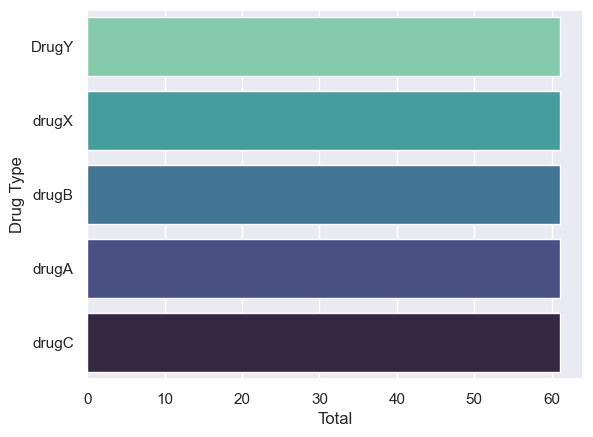

In [23]:
# Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

# Modeling 

## Categorical Naive Bayes Theorem

In [24]:
#importing the categorical naive bayes theorem model
from sklearn.naive_bayes import CategoricalNB
#importing the classification reporting 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#creates an instance of the Categorical Naive Bayes classifier 
NBclassifier1 = CategoricalNB()
#fiting the classifier to the training data.
NBclassifier1.fit(X_train, y_train)

#useing the trained classifier to make predictions on the test data. 
y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.50      0.50      0.50         4
       drugX       0.75      1.00      0.86        18

    accuracy                           0.80        60
   macro avg       0.72      0.83      0.76        60
weighted avg       0.85      0.80      0.80        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  2]
 [ 0  0  0  0 18]]
Categorical Bayes accuracy is: 80.00%


## Gaussian Naive Bayes Theorem

In [25]:
#importing the Gaussian naive bayes theorem model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#creates an instance of the Gaussian Naive Bayes classifier 
NBclassifier2 = GaussianNB()
#fiting the classifier to the training data.
NBclassifier2.fit(X_train, y_train)

#useing the trained classifier to make predictions on the test data. 
y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       DrugY       0.63      0.97      0.76        30
       drugA       1.00      0.20      0.33         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.50      0.67         4
       drugX       1.00      0.39      0.56        18

    accuracy                           0.70        60
   macro avg       0.88      0.61      0.64        60
weighted avg       0.80      0.70      0.66        60

[[29  0  1  0  0]
 [ 4  1  0  0  0]
 [ 0  0  3  0  0]
 [ 2  0  0  2  0]
 [11  0  0  0  7]]
Gaussian Naive Bayes accuracy is: 70.00%


## K-nearest-neighbours (KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a K-NN classifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
# Fit the K-NN classifier on the training data
KNclassifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate the accuracy of K-NN predictions
from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.80      0.67      0.73        30
       drugA       0.57      0.80      0.67         5
       drugB       0.33      0.33      0.33         3
       drugC       0.40      0.50      0.44         4
       drugX       0.80      0.89      0.84        18

    accuracy                           0.72        60
   macro avg       0.58      0.64      0.60        60
weighted avg       0.73      0.72      0.72        60

[[20  2  1  3  4]
 [ 0  4  1  0  0]
 [ 1  1  1  0  0]
 [ 2  0  0  2  0]
 [ 2  0  0  0 16]]
K Neighbours accuracy is: 71.67%


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
compare = pd.DataFrame({'Model': ['K-NN accuracy', 'GaussianNB', 'CategoricalNB'],
                       'Accuracy': [KNAcc*100, NBAcc2*100, NBAcc1*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,CategoricalNB,80.000000
0,K-NN accuracy,71.666667
1,GaussianNB,70.000000


## Testing different split ratios

In [29]:
from sklearn.model_selection import train_test_split
#we are defining a list of split ratios, which specify the proportions of the data to be used for training
split_ratios = [0.6, 0.7, 0.8]
for ratio in split_ratios:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

In [30]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [31]:
# Fit the classifier on the training data
NBclassifier = CategoricalNB()
NBclassifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = NBclassifier.predict(X_test)

# Calculate the accuracy of predictions
accuracy = accuracy_score(y_test, y_pred)

print("Split Ratio:", ratio)
print("Accuracy:", accuracy)
print("")

Split Ratio: 0.8
Accuracy: 0.85



The Categorical Naive Bayes classifier using a split ratio of 0.8 (80% of the data for training and 20% for testing). The accuracy of the predictions on the testing data is 0.85, indicating that the classifier achieved an 85% accuracy rate. This means that 85% of the instances in the testing data were correctly classified by the Categorical Naive Bayes model. Keep in mind that accuracy is just one metric to evaluate the performance of a classifier.

In [32]:
# Fit the classifier on the training data
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = NBclassifier.predict(X_test)

# Calculate the accuracy of predictions
accuracy = accuracy_score(y_test, y_pred)

print("Split Ratio:", ratio)
print("Accuracy:", accuracy)
print("")

Split Ratio: 0.8
Accuracy: 0.9



The Gaussian Naive Bayes classifier using a split ratio of 0.8 (80% of the data for training and 20% for testing). The accuracy of the predictions on the testing data is 0.9, indicating that the classifier achieved a 90% accuracy rate. This means that 90% of the instances in the testing data were correctly classified by the Gaussian Naive Bayes model. Keep in mind that accuracy is just one metric to evaluate the performance of a classifier. 

In [33]:
# Fit the classifier on the training data
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of predictions
accuracy = accuracy_score(y_test, y_pred)

print("Split Ratio:", ratio)
print("Accuracy:", accuracy)
print("")

Split Ratio: 0.8
Accuracy: 0.725



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The k-Nearest Neighbors (k-NN) classifier with k=5 using a split ratio of 0.8 (80% of the data for training and 20% for testing). The accuracy of the predictions on the testing data is 0.725, indicating that the classifier achieved a 72.5% accuracy rate. This means that 72.5% of the instances in the testing data were correctly classified by the k-NN model. Keep in mind that accuracy is just one metric to evaluate the performance of a classifier. 

# Model improvements

##  Hyperparameter tuning 

In [34]:
#importing liabaries for hyperparameter tuning and feature selection 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

In [35]:
# Hyperparameter tuning for K-NN Classifier
param_grid_knn = {'n_neighbors': [3, 5, 7]}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [36]:
# Fit the K-NN classifier with the best hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print the accuracy
new_accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", new_accuracy_knn)

Classification Report:
              precision    recall  f1-score   support

       DrugY       0.68      0.87      0.76        15
       drugA       0.83      0.83      0.83         6
       drugB       1.00      0.67      0.80         3
       drugC       1.00      0.60      0.75         5
       drugX       0.70      0.64      0.67        11

    accuracy                           0.75        40
   macro avg       0.84      0.72      0.76        40
weighted avg       0.77      0.75      0.75        40

Confusion Matrix:
[[13  0  0  0  2]
 [ 0  5  0  0  1]
 [ 0  1  2  0  0]
 [ 2  0  0  3  0]
 [ 4  0  0  0  7]]
Accuracy: 0.75


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


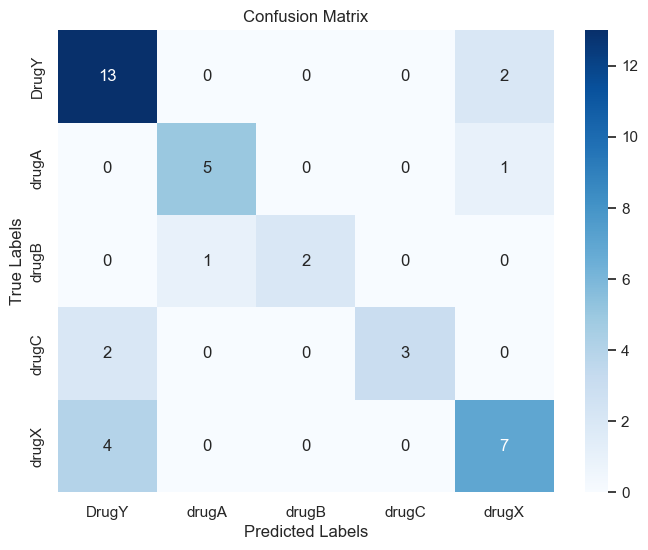

In [38]:
# Define the confusion matrix values
confusion_matrix_values = np.array([[13, 0, 0, 0, 2],
                                   [0, 5, 0, 0, 1],
                                   [0, 1, 2, 0, 0],
                                   [2, 0, 0, 3, 0],
                                   [4, 0, 0, 0, 7]])

# Define the class labels
class_labels = ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_values, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The first row represents the instances of the first class ("DrugY"). Out of 15 instances, 13 were correctly predicted as "DrugY," but 2 instances were mistakenly predicted as the fifth class ("drugX").
The second row corresponds to the instances of the second class ("drugA"). All 6 instances were correctly predicted as "drugA," except for 1 instance that was incorrectly predicted as the fifth class.
The third row represents the instances of the third class ("drugB"). Out of 3 instances, 2 were correctly predicted as "drugB," but 1 instance was mistakenly predicted as the second class.
The fourth row represents the instances of the fourth class ("drugC"). Out of 5 instances, 3 were correctly predicted as "drugC," but 2 instances were predicted as the first class.
The fifth row corresponds to the instances of the fifth class ("drugX"). Out of 11 instances, 7 were correctly predicted as "drugX," but 4 instances were mistakenly predicted as the first class.

## Feature selection

In [39]:
# Feature selection using SelectKBest for K-NN
k_knn = 3  # Number of top features to select for K-NN
selector_knn = SelectKBest(score_func=chi2, k=k_knn)
X_train_selected_knn = selector_knn.fit_transform(X_train, y_train)
X_test_selected_knn = selector_knn.transform(X_test)

In [40]:
# Fit the K-NN classifier with the selected features
knn_classifier_selected = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])
knn_classifier_selected.fit(X_train_selected_knn, y_train)

KNeighborsClassifier(n_neighbors=7)

In [41]:
# Evaluate the K-NN classifier performance with selected features
y_pred_selected_knn = knn_classifier_selected.predict(X_test_selected_knn)
accuracy_selected_knn = accuracy_score(y_test, y_pred_selected_knn)
print("K-NN accuracy with selected features:", accuracy_selected_knn)
print(classification_report(y_test, y_pred_selected_knn))

K-NN accuracy with selected features: 0.525
              precision    recall  f1-score   support

       DrugY       0.55      0.73      0.63        15
       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         3
       drugC       0.33      1.00      0.50         5
       drugX       1.00      0.45      0.62        11

    accuracy                           0.53        40
   macro avg       0.38      0.44      0.35        40
weighted avg       0.52      0.53      0.47        40



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defi

Accuracy: The accuracy with selected features for k-NN is 0.525 (52.5%).
Precision: The precision is low for most classes, except for "drugX," where it is 1.00. This suggests that when k-NN predicts instances as "drugX," it is usually correct. However, for other classes, precision is either 0 or low, indicating a high number of false positives.
Recall: The recall is highly variable across classes. It is highest for "drugC" (1.00), indicating that k-NN can correctly identify all instances of "drugC." However, recall is low or 0 for classes like "drugA" and "drugB," indicating a higher number of false negatives.
F1-score: The F1-scores are generally low for most classes, reflecting the poor precision and recall values.

## Hyperparameter tuning

In [42]:
# Hyperparameter tuning for Naïve Bayes Classifier
param_grid = {'alpha': [1e-9, 1e-8, 1e-7]}
grid_search = GridSearchCV(estimator=CategoricalNB(), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [43]:
# Fit the Naïve Bayes Classifier with the best hyperparameters
NBclassifier1 = CategoricalNB(**best_params)
NBclassifier1.fit(X_train, y_train)

CategoricalNB(alpha=1e-09)

In [44]:
# Make predictions on the testing data
y_pred = NBclassifier1.predict(X_test)

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print the accuracy
CBAcc1 = accuracy_score(y_test, y_pred)
print("Accuracy:", CBAcc1)

Classification Report:
              precision    recall  f1-score   support

       DrugY       0.82      0.93      0.87        15
       drugA       1.00      0.83      0.91         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      0.91      0.95        11

    accuracy                           0.90        40
   macro avg       0.91      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40

Confusion Matrix:
[[14  0  1  0  0]
 [ 1  5  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  4  0]
 [ 1  0  0  0 10]]
Accuracy: 0.9


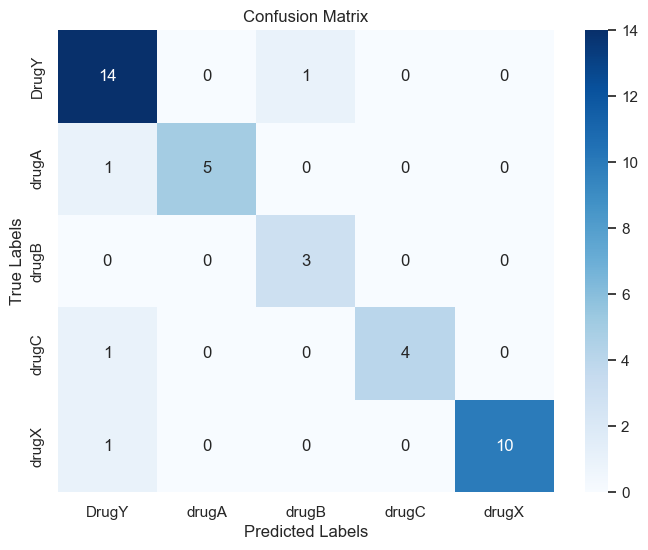

In [45]:
# Define the confusion matrix values
confusion_matrix_values = np.array([[14, 0, 1, 0, 0],
                                   [1, 5, 0, 0, 0],
                                   [0, 0, 3, 0, 0],
                                   [1, 0, 0, 4, 0],
                                   [1, 0, 0, 0, 10]])

# Define the class labels
class_labels = ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_values, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The first row indicates that out of 15 instances of the first class ("DrugY"), 14 were correctly predicted as "DrugY," and 1 instance was mistakenly predicted as the third class.
The second row shows that out of 6 instances of the second class ("drugA"), all were correctly predicted as "drugA."
The third row represents the instances of the third class ("drugB"). All 3 instances were correctly predicted as "drugB."
The fourth row represents the instances of the fourth class ("drugC"). Out of 5 instances, 4 were correctly predicted as "drugC," and 1 instance was not predicted correctly.
The fifth row corresponds to the instances of the fifth class ("drugX"). All 10 instances were correctly predicted as "drugX.

## Feature selection 

In [46]:
# Feature selection using SelectKBest
k = 3  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Fit the classifier with the selected features
NBclassifier_selected = CategoricalNB(alpha=best_params['alpha'])
NBclassifier_selected.fit(X_train_selected, y_train)

CategoricalNB(alpha=1e-09)

In [47]:
# Evaluate the model performance with selected features
y_pred_selected = NBclassifier_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print("Accuracy with selected features:", accuracy_selected)
print("Classification Report with selected features:")
print(classification_report(y_test, y_pred_selected))

Accuracy with selected features: 0.6
Classification Report with selected features:
              precision    recall  f1-score   support

       DrugY       0.54      0.87      0.67        15
       drugA       0.55      1.00      0.71         6
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         5
       drugX       1.00      0.45      0.62        11

    accuracy                           0.60        40
   macro avg       0.42      0.46      0.40        40
weighted avg       0.56      0.60      0.53        40



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: The accuracy with selected features for Naive Bayes is 0.6 (60%).
Precision: The precision varies across classes. It is highest for "drugX" (1.00), indicating that when Naive Bayes predicts instances as "drugX," it is mostly correct. However, precision is low for classes like "drugB," "drugC," and "DrugY," indicating a higher number of false positives.
Recall: The recall also varies across classes. It is highest for "drugA" (1.00), indicating that Naive Bayes can correctly identify most instances of "drugA." However, the recall is low for classes like "drugB," "drugC," and "drugX," indicating a higher number of false negatives.
F1-score: The F1-score considers both precision and recall, providing a balanced measure of performance. The F1-scores are relatively low for most classes, indicating poor overall performance in terms of both precision and recall.

### Comparing Naïve Bayes vs. K-NN confusion matrix

Here are some observations from the comparison:

Accuracy: The accuracy of the Naive Bayes confusion matrix is 0.9 (90%), while the accuracy of the KNN confusion matrix is 0.75 (75%). This means that the first model had a higher overall accuracy in its predictions compared to the second model.
Class-wise Performance: In the Naive Bayes confusion matrix, the models seem to perform well for most classes, with high precision, recall, and F1-scores. However, the KNN confusion matrix shows varying performance across classes. Some classes have high precision, recall, and F1-scores (e.g., "drugA" and "drugB"), while others have lower scores (e.g., "DrugY" and "drugX").
Confusion Patterns: Comparing the misclassifications, the Naive Bayes confusion matrix has fewer instances of misclassifications compared to the second confusion matrix. However, the types of misclassifications differ between the two matrices. For example, in the first matrix, there are false negatives for the first class ("DrugY") and false positives for the fourth class ("drugC"). In the second matrix, there are misclassifications across multiple classes, with false positives for the first and fifth classes and false negatives for the fourth class.
###### Overall, the Naive Bayes confusion matrix demonstrates better performance in terms of accuracy and more consistent class-wise performance

### Comparing Naïve Bayes vs. K-NN feature selction  

Comparing Naive Bayes and k-NN, both models show relatively poor performance with selected features. Naive Bayes generally performs better in terms of precision, recall, and F1-score compared to k-NN. However, it is important to note that both models exhibit limitations in correctly classifying instances across different classes, as indicated by the low accuracy and F1-scores.

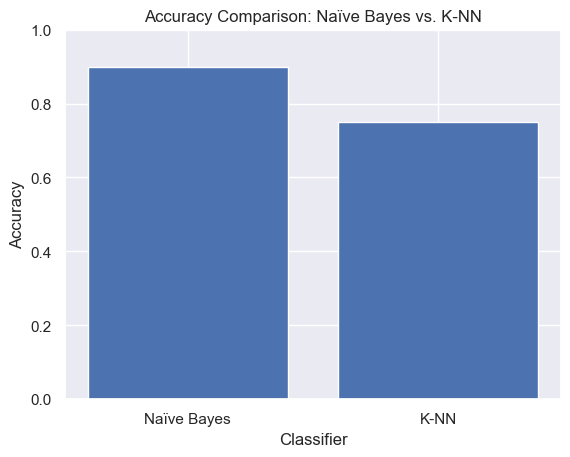

In [48]:
# Accuracy comparison
labels = ['Naïve Bayes', 'K-NN']
accuracy_scores = [CBAcc1, new_accuracy_knn]

plt.bar(labels, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Naïve Bayes vs. K-NN')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1

plt.show()

# Predicting the drug type using the CategoricalNB

In [78]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [81]:
import joblib
joblib.dump(NBclassifier1, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [82]:
# Make predictions
y_pred = NBclassifier1.predict(X_test)

In [87]:
# Create a DataFrame with the patient's information
patient_data = pd.DataFrame({
    'Sex_F': [0],
    'Sex_M': [1],
    'BP_HIGH': [1],
    'BP_LOW': [0],
    'BP_NORMAL': [0],
    'Cholesterol_HIGH': [0],
    'Cholesterol_NORMAL': [1],
    'Age_binned_<20s': [0],
    'Age_binned_20s': [0],
    'Age_binned_30s': [0],
    'Age_binned_40s': [1],
    'Age_binned_50s': [0],
    'Age_binned_60s': [0],
    'Age_binned_>60s': [0],
    'Na_to_K_binned_<10': [0],
    'Na_to_K_binned_10-20': [0],
    'Na_to_K_binned_20-30': [0],
    'Na_to_K_binned_>30': [0]
})

# Make predictions for the patient
y_pred = NBclassifier1.predict(patient_data)

# Print the predicted drug type
print("Predicted Drug Type:", y_pred[0])

Predicted Drug Type: drugA
